In [17]:
import sys
from pathlib import Path
sys.path.insert(1, Path.cwd().parent.as_posix())

from matplotlib import pyplot as plt
import numpy as np
from numpy import typing as npt
from typing import TypedDict
from utils.oscilloscope import Oscilloscope, plot_data
from rberga06.phylab import Datum as d

In [ ]:
class DataSet(TypedDict):
    R: float
    Freq: npt.NDArray[np.float64]
    V: list[tuple[npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64]]]

In [3]:
all_data_day1 = [Oscilloscope.Elettr.load_data(i, dir="data/day1", plot_dir="elab/day1") for i in range(51)]
all_data_day2 = [Oscilloscope.Elettr.load_data(i, dir="data/day2", plot_dir="elab/day2") for i in range(27)]

In [ ]:
dati: list[DataSet] = [{
    "R": 1.e3,  # Ohm
    "Freq": np.array([
        np.nan, 1., 4.96, np.nan, np.nan, 10.2, 20.10, 50.13, 100.2, 200.0, 500.3, 1.004e3,
        np.nan, np.nan, 2.000e3, 5.000e3, 7.500e3, 10.000e3,
        15.e3, # forse qualitativo?
        20.02e3,
        # manca un 25.02 kHz
        30.01e3, 49.99e3, 99.99e3, 200.1e3, 499.9e3, 999.9e3, 5.001e6,
    ]),
    # "dFreq": np.array([.01, .01, .1, .01, .01, .1, .1, .3, .001e3]),
    "V": all_data_day1[0:26],
}, {
    "R": 1.e3,
    "Freq": np.array([]),
    "V": all_data_day2[0:],
}, {
    "R": 1.e3,
    "Freq": np.array([]),
    "V": all_data_day2[0:0],
}
#{
    # R = 100 Ohm
    # "Freq": np.array([1., ])
#}
]

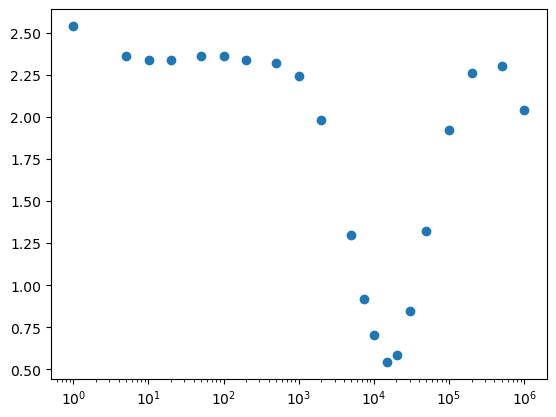

In [16]:
for set_di_dati in dati:
    frequenze = []
    ampiezze_ch1 = []
    for f, (t, ch1, ch2) in zip(set_di_dati["Freq"], set_di_dati["V"]):
        if np.isnan(f):
            continue
        ampiezza = max(np.nanmax(ch1), -np.nanmin(ch1))
        ampiezze_ch1.append(ampiezza)
        frequenze.append(f)

    plt.scatter(frequenze, ampiezze_ch1)
    plt.xscale("log")
    plt.show()